In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
pd.read_csv("blackjack-rl.csv").head()

,Episode,Dealer,Current Hand,Num Hands,Hand,Has Ace,Can Split,Has Hit,Bet Size,Insurance,Action,Reward,Episode Net Reward
0,0,8,0,1,15,0,0,0,1,0.0,STAND,-1.0,-1.0
1,1,2,0,1,15,0,0,0,1,0.0,STAND,-1.0,-1.0
2,2,2,0,1,13,0,0,0,1,0.0,STAND,1.0,1.0
3,3,10,0,1,17,0,0,0,1,0.0,HIT,-1.0,-1.0
4,4,6,0,1,15,0,0,0,1,0.0,HIT,0.0,NaN


In [7]:
DATA_FILE = "blackjack-rl-eval.csv"
names = ["Episode", "Dealer", "Current Hand", "Num Hands", "Hand", "Has Ace", "Can Split", "Has Hit", "Bet Size", "Insurance", "Action", "Reward", "Episode Net Reward"]

raw_df = pd.read_csv(DATA_FILE, names = names, header=None)

In [8]:
raw_df.head()

,Episode,Dealer,Current Hand,Num Hands,Hand,Has Ace,Can Split,Has Hit,Bet Size,Insurance,Action,Reward,Episode Net Reward
0,8099721739,4,0,1,18,0,0,1,1,0.0,STAND,-1.0,-1.0
1,8099721740,3,0,1,15,0,0,0,1,0.0,STAND,-1.0,-1.0
2,8099721741,8,0,1,15,0,0,0,1,0.0,HIT,-1.0,-1.0
3,8099721742,5,0,1,11,0,0,0,1,0.0,HIT,0.0,NaN
4,8099721742,5,0,1,20,0,0,1,1,0.0,STAND,1.0,1.0


In [9]:
raw_df.shape

(500000, 13)

In [10]:
raw_df['Action'].unique()

array(['STAND', 'HIT', 'INSURANCE_HALF', 'INSURANCE_FULL', 'SPLIT',
       'DOUBLE_DOWN'], dtype=object)

In [11]:
def plot_rolling_rewards(df, window, title):
  plot_df = df[["Episode Net Reward"]].dropna().reset_index().rolling(window, step = window).mean()
  plt.plot(plot_df["Episode Net Reward"])
  plt.xlabel("Game")
  plt.ylabel("Profit")
  plt.title(title)

In [12]:
def plot_proportion_hands(df, hands_df, title):
  plot_df = df / hands_df
  plot_df.dropna().plot(kind='bar')
  plt.xlabel("Hand")
  plt.ylabel("Proportion of hands")
  plt.title(title)

## Training results

In [13]:
raw_df[["Episode Net Reward"]].dropna().mean()

Episode Net Reward   -0.027967
dtype: float64

In [14]:
raw_df[["Episode Net Reward"]].dropna().tail(10000).mean()

Episode Net Reward   -0.023575
dtype: float64

In [70]:
raw_df["Episode Net Reward"].dropna().tail(10000).std()

1.0124366509427722

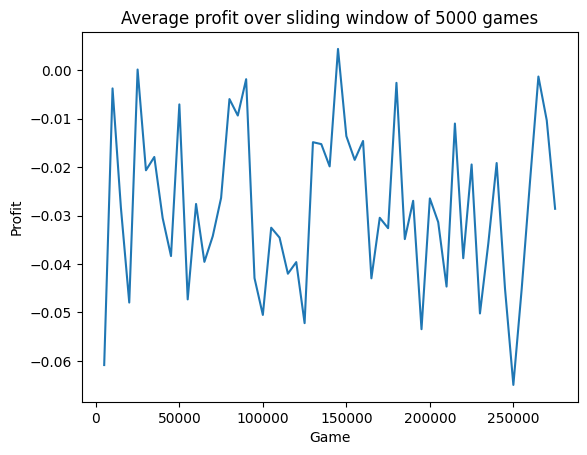

In [17]:
plot_rolling_rewards(raw_df, 5000, "Average profit over sliding window of 5000 games")

## Decisions investigation

In [18]:
# Create new columns for the max hand including ace
raw_df['Max Hand'] = np.where(raw_df['Hand'] + raw_df['Has Ace'] * 10 <= 21, raw_df['Hand'] + raw_df['Has Ace'] * 10, raw_df['Hand'])

In [19]:
# Create new dataframe for proportion of each hand
hands_df = raw_df['Hand'].value_counts()
max_hands_df = raw_df['Max Hand'].value_counts()

### Hit

In [20]:
hit_df = raw_df[raw_df["Action"] == "HIT"]

In [25]:
hit_df['Hand'].mean()

11.647512538375635

In [26]:
hit_df['Max Hand'].value_counts()

13    36071
12    32522
14    30939
15    29137
16    26551
11    16851
17    16116
10    13646
9     11647
8      8729
7      7147
18     6082
19     5067
6      4386
5      3581
20      747
4       596
21       18
Name: Max Hand, dtype: int64

In [27]:
hit_df['Max Hand'].mean()

12.978081358347376

In [28]:
hit_df['Dealer'].mean()

7.109861387406788

In [29]:
smaller_hand_df = raw_df[raw_df['Hand'] <= raw_df['Dealer']]

In [30]:
smaller_hand_df[smaller_hand_df['Action'] == "HIT"].shape[0] / smaller_hand_df.shape[0]

0.9011074972209642

In [31]:
larger_hand_df = raw_df[raw_df['Max Hand'] > raw_df['Dealer']]

In [32]:
larger_hand_df[larger_hand_df['Action'] == "HIT"].shape[0] / larger_hand_df.shape[0]

0.4762362804685958

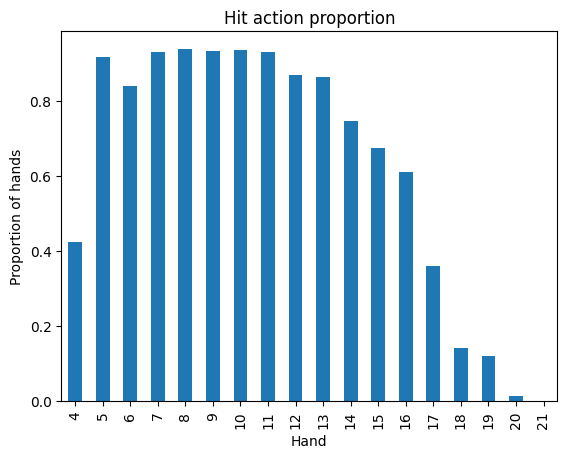

In [34]:
plot_proportion_hands(hit_df['Max Hand'].value_counts(), max_hands_df, "Hit action proportion")

### Stand

In [35]:
stand_df = raw_df[raw_df['Action'] == "STAND"]

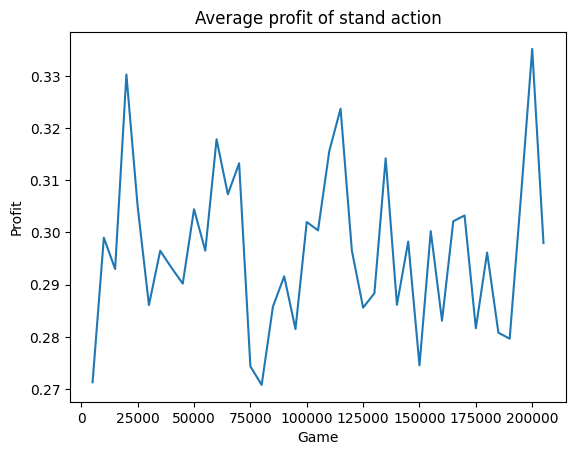

In [38]:
plot_rolling_rewards(stand_df, 5000, "Average profit of stand action")

In [39]:
stand_df["Episode Net Reward"].mean()

0.2969234598154459

In [40]:
stand_df['Dealer'].mean()

6.188183335779278

In [41]:
stand_df['Hand'].mean()

17.216094621367773

In [42]:
stand_df['Max Hand'].mean()

18.424589998532433

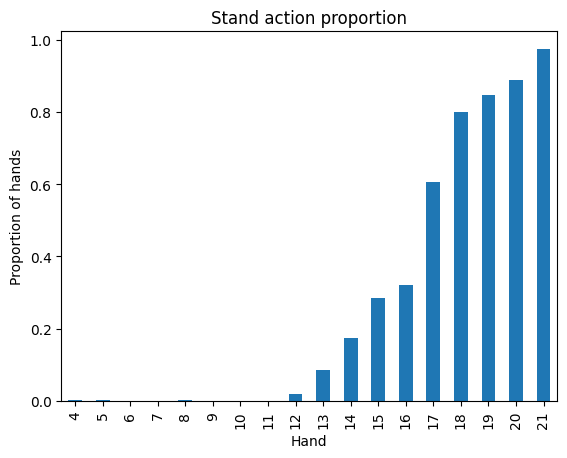

In [44]:
plot_proportion_hands(stand_df['Max Hand'].value_counts(), max_hands_df, "Stand action proportion")

### Double Down

In [45]:
double_df = raw_df[raw_df['Action'] == "DOUBLE_DOWN"]

In [46]:
double_df.shape

(369, 14)

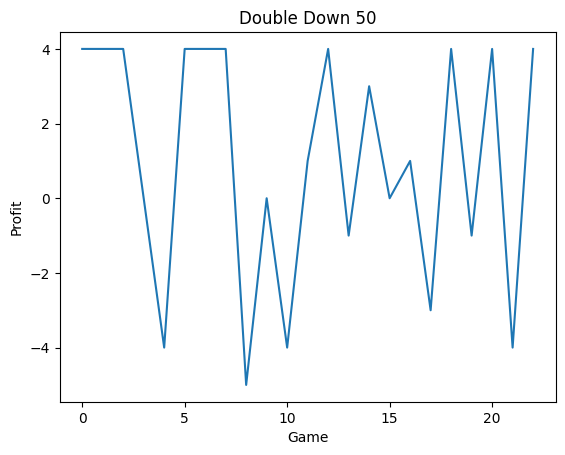

In [50]:
plot_rolling_rewards(double_df, 1, "Double Down 50")

In [51]:
double_df['Episode Net Reward'].mean()

1.0

In [52]:
double_df['Hand'].mean()

10.268292682926829

In [53]:
double_df['Hand'].value_counts()

11    171
10    126
9      72
Name: Hand, dtype: int64

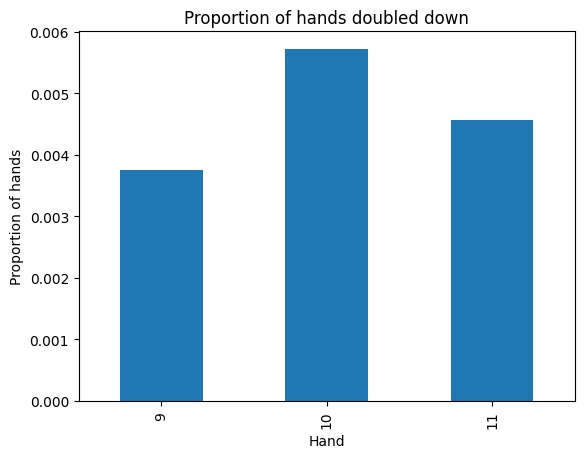

In [54]:
plot_proportion_hands(double_df['Hand'].value_counts(), hands_df, "Proportion of hands doubled down")

In [55]:
double_df['Max Hand'].mean()

11.433604336043361

In [56]:
double_df['Dealer'].mean()

4.897018970189702

### Split

In [57]:
split_df = raw_df[raw_df['Action'] == "SPLIT"]

In [58]:
split_df.shape

(10393, 14)

In [59]:
split_df['Hand'].mean()

13.66458193014529

<Axes: >

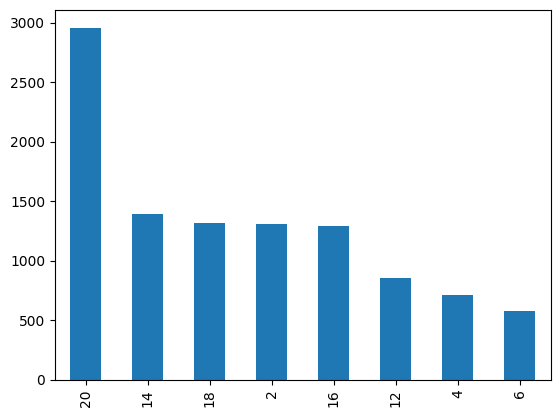

In [60]:
split_df['Hand'].value_counts().plot(kind='bar')

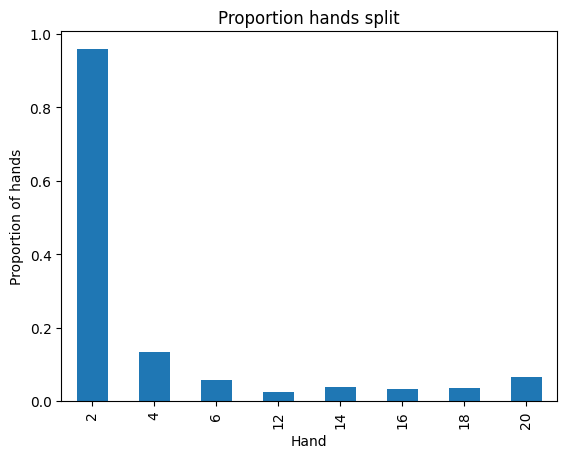

In [61]:
plot_proportion_hands(split_df['Hand'].value_counts(), hands_df, "Proportion hands split")

### Insurance

In [62]:
insurance_df = raw_df[(raw_df['Action'] == "INSURANCE_HALF") | (raw_df['Action'] == "INSURANCE_FULL")]

In [63]:
insurance_df['Dealer'].count() / raw_df[raw_df['Dealer'] == 1].shape[0]

0.3699911647003794

In [64]:
insurance_df['Max Hand'].mean()

14.562110783349722

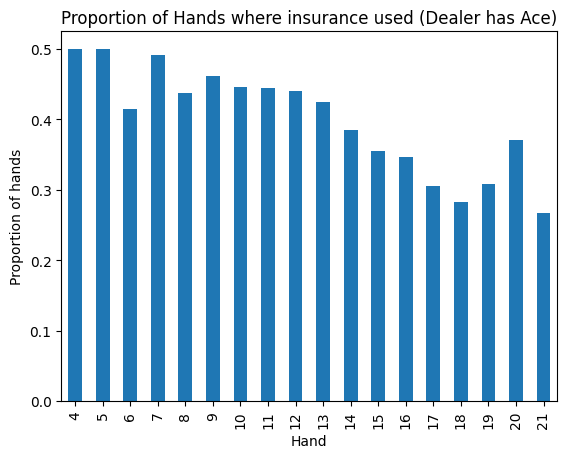

In [69]:
plot_proportion_hands(insurance_df['Max Hand'].value_counts(), raw_df[raw_df['Dealer'] == 1]['Max Hand'].value_counts(), "Proportion of Hands where insurance used (Dealer has Ace)")

## By hand value

### Hand of 10

In [85]:
hand_10_df = raw_df[raw_df["Max Hand"] == 10].tail(10000)

<Axes: >

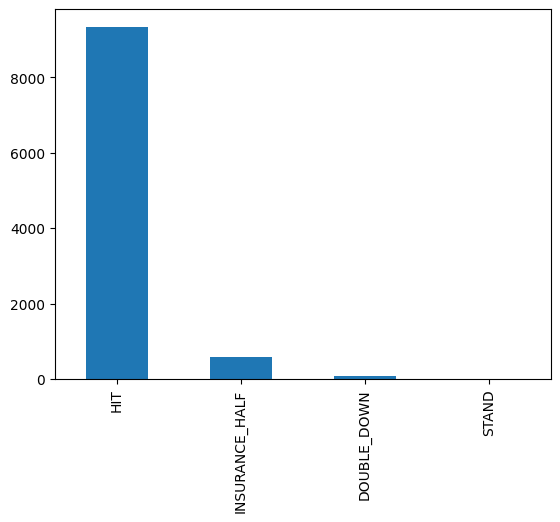

In [86]:
hand_10_df['Action'].value_counts().plot(kind='bar')

In [88]:
hand_10_df[hand_10_df['Action'] == "STAND"]
# Seems to be standing on 10 when it has a lot of hands (split twice or more)

,Episode,Dealer,Current Hand,Num Hands,Hand,Has Ace,Can Split,Has Hit,Bet Size,Insurance,Action,Reward,Episode Net Reward,Max Hand
159902,8099810916,5,1,3,10,0,0,1,1,0.0,STAND,0.0,NaN,10
200239,8099833250,4,1,2,10,0,0,0,1,0.0,STAND,3.0,3.0,10
224658,8099846884,10,0,3,10,0,0,0,1,0.0,STAND,0.0,NaN,10
228002,8099848752,3,1,3,10,0,0,0,1,0.0,STAND,0.0,NaN,10
228531,8099849045,4,1,2,10,0,0,0,1,0.0,STAND,1.0,1.0,10
288171,8099882335,5,1,3,10,0,0,0,1,0.0,STAND,0.0,NaN,10
386608,8099936978,2,1,2,10,0,0,0,1,0.0,STAND,3.0,3.0,10
389708,8099938680,6,0,3,10,0,0,0,1,0.0,STAND,0.0,NaN,10
389937,8099938805,4,2,3,10,0,0,1,1,0.0,STAND,-4.0,-4.0,10
448008,8099971056,2,0,3,10,0,0,0,1,0.0,STAND,0.0,NaN,10


### Hand of 20

In [92]:
hand_20_df = raw_df[raw_df["Max Hand"] == 20].tail(5000)

<Axes: >

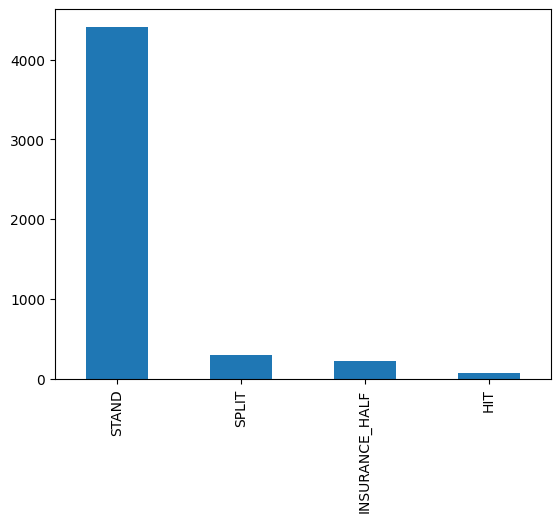

In [93]:
hand_20_df['Action'].value_counts().plot(kind='bar')

In [91]:
hand_20_df[hand_20_df['Action'] == "STAND"]['Episode Net Reward'].mean()

0.5938037865748709

In [94]:
hand_20_df[hand_20_df['Action'] == "HIT"]

,Episode,Dealer,Current Hand,Num Hands,Hand,Has Ace,Can Split,Has Hit,Bet Size,Insurance,Action,Reward,Episode Net Reward,Max Hand
453966,8099974416,1,0,1,10,1,0,1,1,0.25,HIT,0.0,NaN,20
456277,8099975666,1,0,1,10,1,0,0,1,0.25,HIT,0.0,NaN,20
456386,8099975727,1,0,1,10,1,0,0,1,0.25,HIT,0.0,NaN,20
457866,8099976580,2,1,3,10,1,0,0,1,0.00,HIT,0.0,NaN,20
458067,8099976690,1,0,1,10,1,0,0,1,0.25,HIT,0.0,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496189,8099997908,1,0,1,10,1,0,0,1,0.25,HIT,0.0,NaN,20
497255,8099998492,1,0,1,10,1,0,0,1,0.25,HIT,0.0,NaN,20
498746,8099999304,6,0,1,10,1,0,0,1,0.00,HIT,0.0,NaN,20
498808,8099999339,1,0,1,10,1,0,0,1,0.25,HIT,0.0,NaN,20


## Basic Strategy Comparison

In [106]:
# Hard hand evaluation
eval_df = raw_df[raw_df['Has Ace'] == 0].tail(10000)
hard_action = {}

for hero_hand in range(8, 22):
  for dealer in range(1, 11):
    hard_action[(hero_hand, dealer)] = eval_df[(eval_df["Hand"] == hero_hand) & (eval_df["Dealer"] == dealer)]['Action'].mode().iloc[0]

In [108]:
hard_action

{(8, 1): 'HIT',
 (8, 2): 'HIT',
 (8, 3): 'HIT',
 (8, 4): 'HIT',
 (8, 5): 'HIT',
 (8, 6): 'HIT',
 (8, 7): 'HIT',
 (8, 8): 'HIT',
 (8, 9): 'HIT',
 (8, 10): 'HIT',
 (9, 1): 'HIT',
 (9, 2): 'HIT',
 (9, 3): 'HIT',
 (9, 4): 'HIT',
 (9, 5): 'HIT',
 (9, 6): 'HIT',
 (9, 7): 'HIT',
 (9, 8): 'HIT',
 (9, 9): 'HIT',
 (9, 10): 'HIT',
 (10, 1): 'HIT',
 (10, 2): 'HIT',
 (10, 3): 'HIT',
 (10, 4): 'HIT',
 (10, 5): 'HIT',
 (10, 6): 'HIT',
 (10, 7): 'HIT',
 (10, 8): 'HIT',
 (10, 9): 'HIT',
 (10, 10): 'HIT',
 (11, 1): 'HIT',
 (11, 2): 'HIT',
 (11, 3): 'HIT',
 (11, 4): 'HIT',
 (11, 5): 'HIT',
 (11, 6): 'HIT',
 (11, 7): 'HIT',
 (11, 8): 'HIT',
 (11, 9): 'HIT',
 (11, 10): 'HIT',
 (12, 1): 'HIT',
 (12, 2): 'HIT',
 (12, 3): 'HIT',
 (12, 4): 'HIT',
 (12, 5): 'HIT',
 (12, 6): 'HIT',
 (12, 7): 'HIT',
 (12, 8): 'HIT',
 (12, 9): 'HIT',
 (12, 10): 'HIT',
 (13, 1): 'HIT',
 (13, 2): 'HIT',
 (13, 3): 'HIT',
 (13, 4): 'STAND',
 (13, 5): 'HIT',
 (13, 6): 'HIT',
 (13, 7): 'HIT',
 (13, 8): 'HIT',
 (13, 9): 'HIT',
 (13, 10):

In [109]:
# Soft hand evaluation
eval_df = raw_df[raw_df['Has Ace'] == 1].tail(10000)
soft_action = {}

for hero_hand in range(2, 12):
  for dealer in range(1, 11):
    soft_action[(hero_hand, dealer)] = eval_df[(eval_df["Hand"] == hero_hand) & (eval_df["Dealer"] == dealer)]['Action'].mode().iloc[0]

In [110]:
soft_action

{(2, 1): 'SPLIT',
 (2, 2): 'SPLIT',
 (2, 3): 'SPLIT',
 (2, 4): 'SPLIT',
 (2, 5): 'SPLIT',
 (2, 6): 'SPLIT',
 (2, 7): 'SPLIT',
 (2, 8): 'SPLIT',
 (2, 9): 'SPLIT',
 (2, 10): 'SPLIT',
 (3, 1): 'HIT',
 (3, 2): 'HIT',
 (3, 3): 'HIT',
 (3, 4): 'HIT',
 (3, 5): 'HIT',
 (3, 6): 'HIT',
 (3, 7): 'HIT',
 (3, 8): 'HIT',
 (3, 9): 'HIT',
 (3, 10): 'HIT',
 (4, 1): 'HIT',
 (4, 2): 'HIT',
 (4, 3): 'HIT',
 (4, 4): 'HIT',
 (4, 5): 'HIT',
 (4, 6): 'HIT',
 (4, 7): 'HIT',
 (4, 8): 'HIT',
 (4, 9): 'HIT',
 (4, 10): 'HIT',
 (5, 1): 'HIT',
 (5, 2): 'HIT',
 (5, 3): 'HIT',
 (5, 4): 'HIT',
 (5, 5): 'HIT',
 (5, 6): 'HIT',
 (5, 7): 'HIT',
 (5, 8): 'HIT',
 (5, 9): 'HIT',
 (5, 10): 'HIT',
 (6, 1): 'HIT',
 (6, 2): 'HIT',
 (6, 3): 'HIT',
 (6, 4): 'HIT',
 (6, 5): 'HIT',
 (6, 6): 'HIT',
 (6, 7): 'HIT',
 (6, 8): 'HIT',
 (6, 9): 'HIT',
 (6, 10): 'HIT',
 (7, 1): 'HIT',
 (7, 2): 'HIT',
 (7, 3): 'HIT',
 (7, 4): 'HIT',
 (7, 5): 'HIT',
 (7, 6): 'HIT',
 (7, 7): 'HIT',
 (7, 8): 'HIT',
 (7, 9): 'HIT',
 (7, 10): 'HIT',
 (8, 1): 'HIT'